#                    Predicting The Age of Abalone 🐳🐠

![coffee](https://images.unsplash.com/photo-1495004984586-0dc339ad4b2c?ixlib=rb-0.3.5&ixid=eyJhcHBfaWQiOjEyMDd9&s=3a6bedd3ca3b1ced9521b663a8f4ccfd&auto=format&fit=crop&w=667&q=80)

*courtesy of Sasha • Stories from Unsplash*

## Overview

The main goal of this notebook is to explore three different Supervised Learning Algorithms: Decision Trees, Random Forest and XGBoost.  I will explore handling missing values, Creating Pipelines, Partial Dependance Plots and One-hot Encoding. 

The focus is on predicting the age of Abalone. These are sea snails that are quite in dangered in South Africa at least, but can be found in Australia, Great Britian and New Zealand. 

![abalone shell](https://cdn.shopify.com/s/files/1/2086/1263/products/1d89434927bffb6fd1786c19c2d921fb_2000x.jpg?v=1522240385)

*An Abalone shell*

We will use various measurements to predict the number of rings the abalone have, which determines it's age once 1.5 is added to the total rings.  

## Table of Contents

* Import packages & Data
* Exploratory Data Analysis
* Data Cleaning
* Feature Engineering 
* Train Models
* Evaluation of Models
* Conclusion
* Resources Used

# Import packages & Data

In [1]:
#Standard libs
import numpy as np 
import pandas as pd 

#Data Visualisation libs
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#Feature engineering, metrics and modeling libs
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing.imputation import Imputer
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

#Detect Missing values
import missingno as msno


import os
print(os.listdir("../input"))



ModuleNotFoundError: No module named 'sklearn.preprocessing.imputation'

Lets read the data into a Pandas dataframe:



In [2]:
abalone = pd.read_csv('abalone.csv')

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Before I give my inital reaction to the data please note the following units of measurement for the various variables:

- `Length` - mm
- `Diameter` - mm
- `Height` - mm
- `Whole weight` - grams
- `Shucked weight` - grams	
- `Viscera weight` -grams	
- `Shell weight` -grams

For the rings you need add 1.5 to get the age in years.

We can see that the mean length from the observations in the dataset is 0.52 mm, while the longest is 0.82 mm and the shortest is 0.075 which is tiny! With the height we get a mininum of 0.0000 which is suspect because that must be a bogus observation. Shell weight seems to not be more than 1 gram, while the oldest Abalone is 30.5 years old and the youngest 2.5 years. The heaviest abalone is 2.83 grams and the lightest 0.001. 

In [6]:
abalone.shape

(4177, 9)

We only have one categorical column while the other eight are numerical. Lets go ahead and see if there are any null values:

In [7]:
len(abalone.isnull())

4177

The `isnull()` method returns a boolean of true or false for the detection of null values.  In our case it has returned `false` for 4177 entries in the dataset, this matches the same amount of entries in the entire dataset. So we can be safe knowing we have no null values.

# Exploratory Data Analysis


Lets go ahead and see the skewness of the target variable  which is `Rings`

C:\Users\bulen\AppData\Local\Temp\ipykernel_38448\4432603.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rings,kde=False,fit=st.norm)
C:\Users\bulen\AppData\Local\Temp\ipykernel_38448\4432603.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rings,kde=False,fit=st.johnsonsu)
C:\Users\bule

<Axes: title={'center': 'Log Normal'}, xlabel='Rings'>

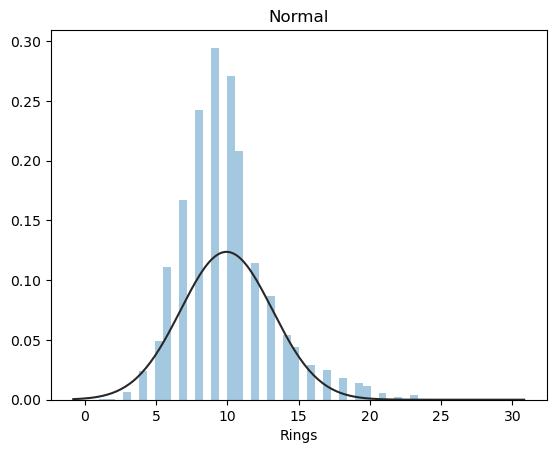

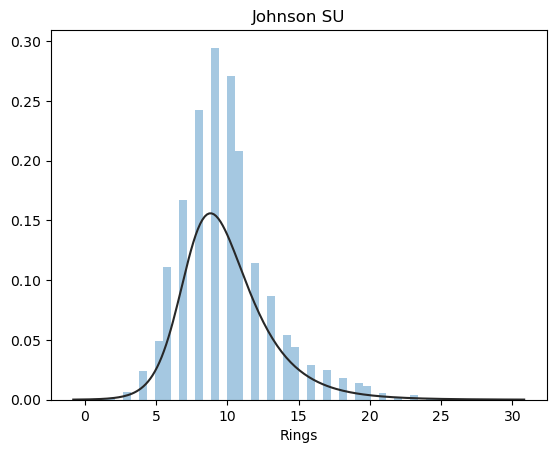

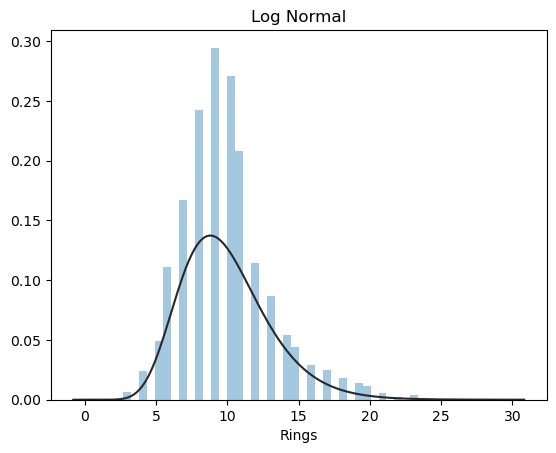

In [8]:
rings = abalone['Rings']
plt.figure(1);plt.title('Normal')
sns.distplot(rings,kde=False,fit=st.norm)
plt.figure(2);plt.title('Johnson SU')
sns.distplot(rings,kde=False,fit=st.johnsonsu)
plt.figure(3);plt.title('Log Normal')
sns.distplot(rings,kde=False,fit=st.lognorm)

None of theses distributions fit our data perfectly. So we need to find another one to match our data.



Text(0, 0.5, 'count')

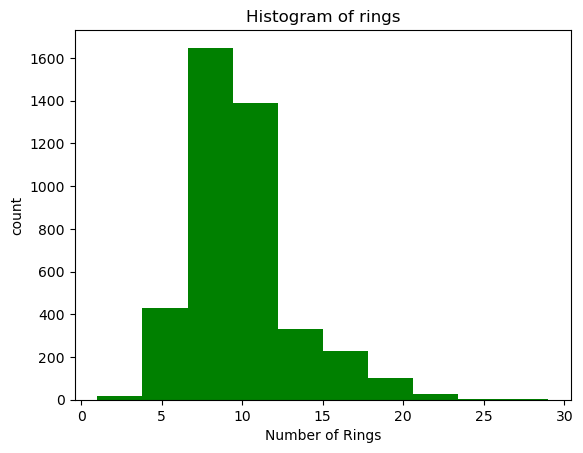

In [9]:
plt.hist(rings,color='green')
plt.title('Histogram of rings')
plt.xlabel('Number of Rings')
plt.ylabel('count')

I would like observe which variables are strongly correlated to one another:



In [10]:
numeric_features = abalone.select_dtypes(include=[np.number])
correlation = numeric_features.corr()

In [11]:
print(correlation['Rings'].sort_values(ascending=False))

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


<Axes: title={'center': 'Correlation of numeric features'}>

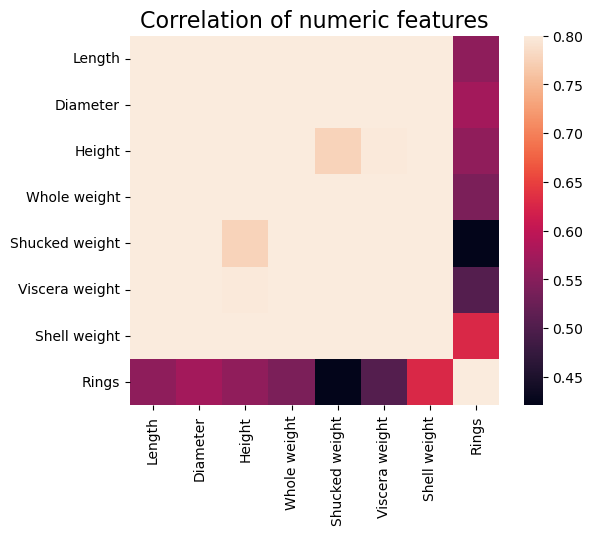

In [12]:
plt.title('Correlation of numeric features', y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

It appears that Shell weight is the only feature that has a correlation above 0.50. All the other features linger around 0.42 - 0.51, I feel this will be a problem when making predictions. 

C:\Users\bulen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\bulen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


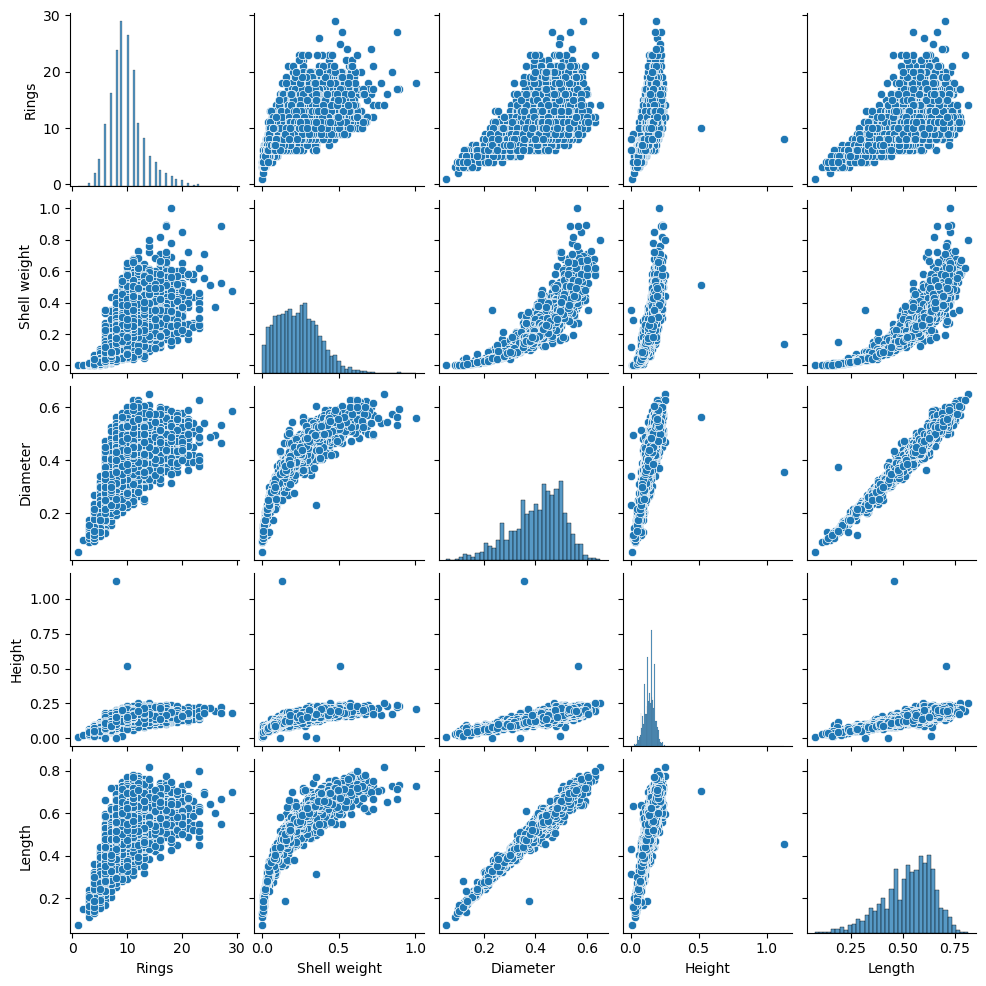

In [13]:
cols = ['Rings','Shell weight','Diameter','Height','Length']
sns.pairplot(abalone[cols],size=2,kind='scatter')
plt.show()

These scatter plots give us a different overview of the correlated features. This is what I've picked up:

* `Height` and `Length` have an interesting relationship in that Abalone's with a height of 0.0 mm - 0.5 mm have varing degrees of length. `Length` and `Diameter` seem to have a nice linear relationship with few outliers. 
* It appears that the the number of `Rings` of an Abalone are all concentrated around a `Height` below 0.5 mm.
* It seems that many Abalone have `Rings` between 5-20 that have`Shell weight`  distributed above 0.00 grams to 0.75 grams. Also the larger in `Diameter` the Abalone is the more `Shell weight` it has too. 

In [14]:
sns.countplot(abalone['Sex'], palette="Set3")
plt.title('Count of the Gender of Abalone')

ValueError: could not convert string to float: 'M'

Males are the most frequent `Sex` of Abalone in the dataset, while Infants just edge out Females. 

Text(0.5, 1.0, 'Distribution of Rings')

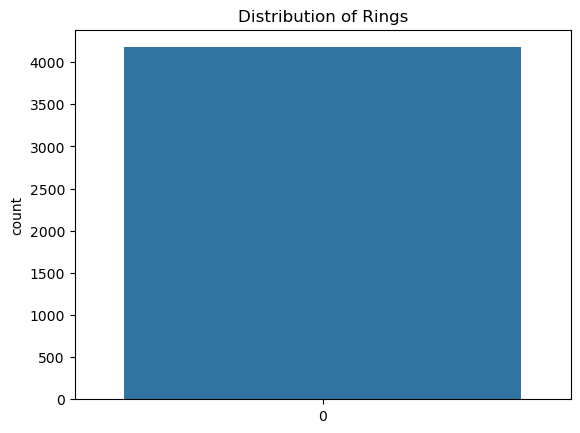

In [15]:
sns.countplot(abalone['Rings'])
plt.title('Distribution of Rings')

It appears that Abalone with `Rings` between 8-10 have the most observations.

C:\Users\bulen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


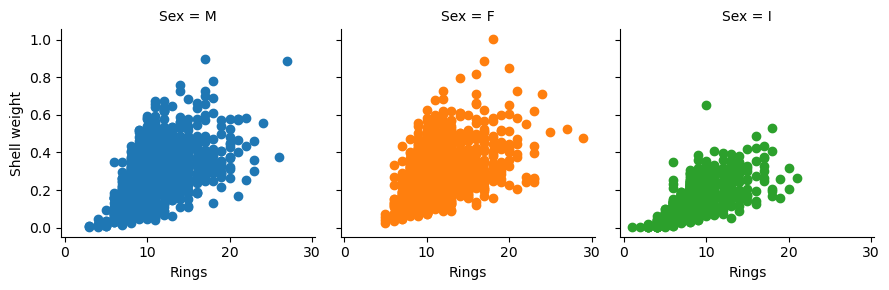

In [16]:
p = sns.FacetGrid(abalone, col="Sex", hue="Sex")
p=p.map(plt.scatter,"Rings", "Shell weight")


With this scatter plot I took the `Shell weight` because it has the highest correlation with `Rings` and tried to see how they compare against the different sexes. 

What first catches the eye is that we can finally see a cut off age for `Rings` in infants which in the region of 20. While Male and Female have a similar distribution, with the Males having more visible outliers. 

C:\Users\bulen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


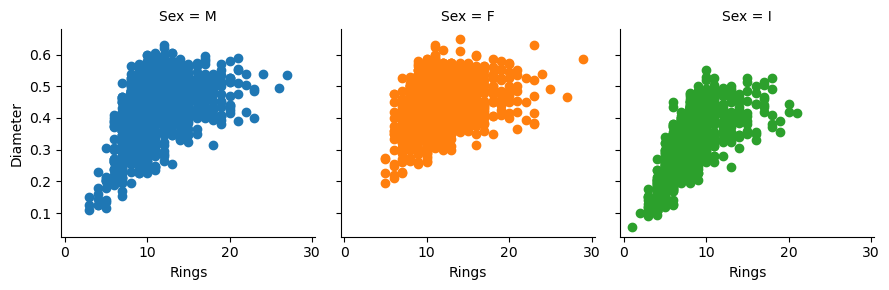

In [17]:
x = sns.FacetGrid(abalone,col="Sex",hue="Sex")
x.map(plt.scatter, "Rings", "Diameter")

In this Case it is the second highest correlated variable `Diameter`. Females only have observations starting from 0.2 mm in diameter and with clear outliers. Otherwise Males and Infants have rough a similar spread of the data.

<Axes: xlabel='Rings', ylabel='Shell weight'>

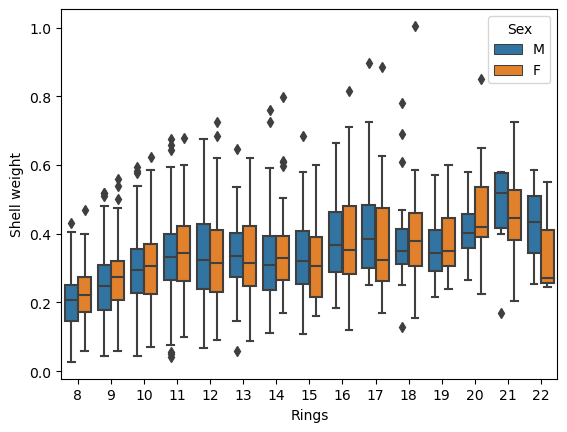

In [18]:
f = (abalone.loc[abalone['Sex'].isin(['M','F'])]
      .loc[:,['Shell weight','Rings','Sex']])

f = f[f["Rings"] >= 8]
f = f[f["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=f)

This box plot allows us to clearly visualize the presence of outliers, meaning we will need to manage them before training on the data.

<Axes: xlabel='Rings', ylabel='Shell weight'>

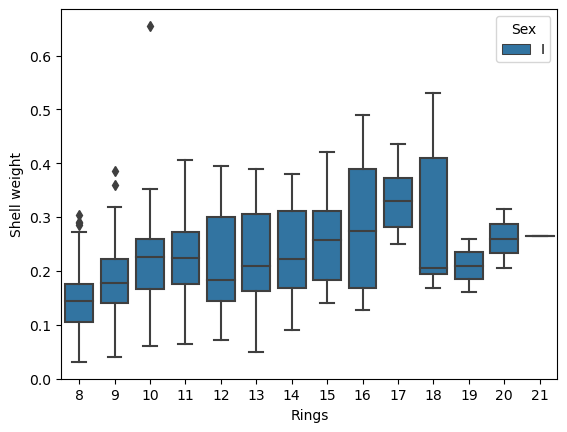

In [19]:
w = (abalone.loc[abalone['Sex'].isin(['I'])]
    .loc[:,['Shell weight','Rings','Sex']])
w = w[w["Rings"] >= 8]
w = w[w["Rings"] < 23]
sns.boxplot(x="Rings",y="Shell weight", hue='Sex',data=w)

As there is only one signifincant outlier while it is clear that infants have `Rings` in the range of 8 -21.

<Axes: xlabel='Rings', ylabel='Diameter'>

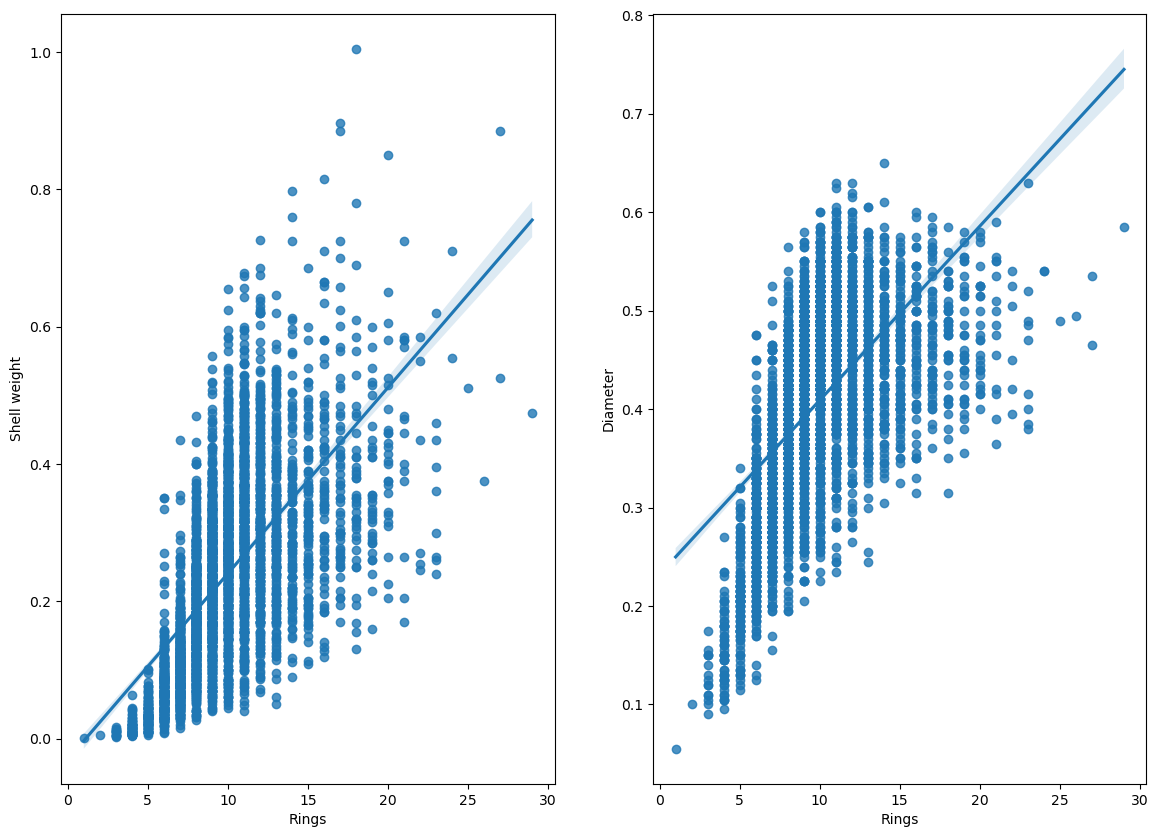

In [20]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,10))

ShellWeight_plot = pd.concat([abalone['Rings'],abalone['Shell weight']],axis=1)
sns.regplot(x='Rings',y='Shell weight',data=ShellWeight_plot,scatter=True,fit_reg=True,ax=ax1)

Diameter_plot = pd.concat([abalone['Rings'],abalone['Diameter']],axis=1)
sns.regplot(x='Rings',y='Diameter',data=Diameter_plot,scatter=True,fit_reg=True,ax=ax2)


#  Data Cleaning

From the EDA it is clear that we will need to do something to remove outliers. To achieve this we can use the Scipy stats module to convert the observations into Zscores. Zscores give us a distribution that illustrate how many standard deviations away from the mean the data is. 



In [21]:
from scipy import stats
z= np.abs(stats.zscore(abalone.select_dtypes(include=[np.number])))
print(z)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0     0.574558  0.432149  1.064424      0.641898        0.607685   
1     1.448986  1.439929  1.183978      1.230277        1.170910   
2     0.050033  0.122130  0.107991      0.309469        0.463500   
3     0.699476  0.432149  0.347099      0.637819        0.648238   
4     1.615544  1.540707  1.423087      1.272086        1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686  0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  
0           0.726212      0.638217  1.571544  
1           1.205221      1.212987  0.910013  
2           0.356690      0.207139  0.2896

In [22]:
abalone_o = abalone[(z < 3).all(axis=1)]

What has happened above is that we are removing all the data points that are below three standard deviations away from the mean.

In [23]:
print("Shape of Abalones with outliers: "+ str(abalone.shape) , 
      "Shape of Abalones without outliers: " + str(abalone_o.shape))

Shape of Abalones with outliers: (4177, 9) Shape of Abalones without outliers: (4027, 9)


#  Feature Engineering 


###  One Hot encoding

We will use a technique called one-hot encoding to create binary columns that will show the presence of each possible value from the original dataset. This is because the model will not know how to handle 'M', 'F' or 'I' when it processes it.

However first I will need to determine the cardinality of columns:



In [24]:
low_cardinality_cols = [cname for cname in abalone_o.columns if
                        abalone_o[cname].nunique() < 10 and 
                       abalone_o[cname].dtype == "object"]
numeric_cols = [cname for cname in abalone_o.columns if
                                 abalone_o[cname].dtype in ['int64','float64']]

my_cols = low_cardinality_cols + numeric_cols
abalone_predictors = abalone_o[my_cols]

In [25]:
abalone_predictors.dtypes.sample(7)

Height            float64
Shell weight      float64
Whole weight      float64
Rings               int64
Length            float64
Diameter          float64
Viscera weight    float64
dtype: object

Now we can encode them with the `get_dummies()` method available to a Pandas Dataframe:

In [26]:
abalone_encoded_predictors = pd.get_dummies(abalone_predictors)

In [27]:
abalone_encoded_predictors.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


In [28]:
abalone_encoded_predictors.shape

(4027, 11)

Our abalone_encoded_predictors dataframe now has three new columns `Sex_F`,  `Sex_I` and  `Sex_M`.

#  Train Models

As mentioned earlier we will be exploring a few models: 

* Decision Trees, 
* Random Forest 
* XGBoost

Each one will be trained with a SkLearn Pipeline and with Cross Validation to compare which method gives us greater accuracy. Key thing to note is that we will be performing Regression with these models, Regression is the study of a depanant variable on one or more explanatory variables. 


### Decision Trees

Decision Trees allow us to use certain criteria which would be the models features to predict/classifiy a target. The data is split into smaller sets based on a feature then it will run a prediction on that feature. 

You can read more about them [here](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052) and [here](https://medium.com/@SeattleDataGuy/what-is-a-decision-tree-algorithm-4531749d2a17).

SkLearn offers two types of Decision Trees: a classifer and regressor. Because we are not trying to determine an event we will use the regressor. 

In [30]:
from sklearn.pipeline import make_pipeline


#### Cross Validation

In [31]:
cross_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Sex_F','Sex_I','Sex_M']
X = abalone_encoded_predictors[cross_cols]
y = abalone_encoded_predictors.Rings

decision_pipeline = make_pipeline(DecisionTreeRegressor())
decision_scores = cross_val_score(decision_pipeline, X,y,scoring='neg_mean_absolute_error')

print('MAE %2f' %(-1 * decision_scores.mean()))

MAE 1.953498


#### Train Test Split

In [32]:
dt_train_X,dt_test_X,dt_train_y,dt_test_y = train_test_split(X,y)

With Decision Trees you are able to run a variation of them to determine how many leaf nodes produces the best set of results. Below we create the pipeline in the `get_mae()` function to return the mean absolute error.

In [33]:
def get_mae(max_leaf_nodes,dt_train_X,dt_test_X,dt_train_y,dt_test_y ):
    model_pipeline = make_pipeline(DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0))
    model_pipeline.fit(dt_train_X,dt_train_y)
    preds_val = model_pipeline.predict(dt_test_X)
    mae = mean_absolute_error(dt_test_y,preds_val)
    return(mae)

Now we can loop over the different leaf nodes to determine which one will give us the lowest MAE.

In [34]:
for max_leaf_nodes in [5,50,500,5000]:
    my_mae = get_mae(max_leaf_nodes,dt_train_X,dt_test_X,dt_train_y,dt_test_y)
    print("Max leaf nodes: %d \t\t MAE: %d" %(max_leaf_nodes,my_mae))

Max leaf nodes: 5 		 MAE: 1
Max leaf nodes: 50 		 MAE: 1
Max leaf nodes: 500 		 MAE: 1
Max leaf nodes: 5000 		 MAE: 1


From this it is clear that any number of leaf nodes will result in the same value for the MAE. I suspect due to the size of the dataset this might be the cause. 

In [35]:
decision_split_pipeline = make_pipeline(DecisionTreeRegressor(max_leaf_nodes=5))
decision_split_pipeline.fit(dt_train_X,dt_train_y)
decision_tree_prediction = decision_split_pipeline.predict(dt_test_X)
print("MAE: " + str(mean_absolute_error(decision_tree_prediction,dt_test_y)))

MAE: 1.649698157346212


In [36]:
acc_decision = decision_split_pipeline.score(dt_test_X,dt_test_y)
print("Acc:", acc_decision )

Acc: 0.40112888558539517


With an accuracy score of 44% our model is performing very poorly.  The MAE for Cross-val is :`1.959743` while for Train-test it is: `1.597016`. In this case the using train-test split for the Decision Tree is best.

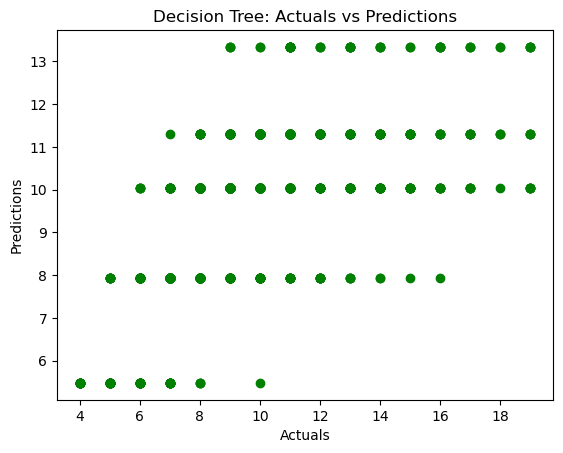

In [37]:
plt.scatter(dt_test_y,decision_tree_prediction,color='green')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Decision Tree: Actuals vs Predictions')
plt.show()

### Random Forests

Random Forests randomly chooses observations and features to generate many decision trees to average the result. While a Decision tree generates rules based on the features in the data. 

The main issue with Random Forests is that they are slow to gather real-time predictions on, but are extremly fast to train.  However, RF prevents overfitting by generating trees on random subsets. 

#### Cross Validation

In [38]:
forest_pipeline = make_pipeline(RandomForestRegressor(random_state=1))
forest_scores = cross_val_score(forest_pipeline, X,y,scoring="neg_mean_absolute_error")
print('MAE %2f' %(-1 * forest_scores.mean()))

MAE 1.473488


#### Train Test Split

In [39]:
f_train_X,f_test_X,f_train_y,f_test_y = train_test_split(X,y)
forest_split_pipeline = make_pipeline(RandomForestRegressor(random_state=1))
forest_split_pipeline.fit(f_train_X,f_train_y)
forest_predictions = forest_split_pipeline.predict(f_test_X)
print("Accuracy:",forest_split_pipeline.score(f_test_X,f_test_y))
print("MAE:",str(mean_absolute_error(forest_predictions,f_test_y)))


Accuracy: 0.531995242959215
MAE: 1.464428997020854


Yet again the train-test split has out performed the cross-validation, with a MAE of `1.511744` vs a MAE of `1.521251`. The Random Forest model also has an accuracy of 48%. These are marginal improvements!

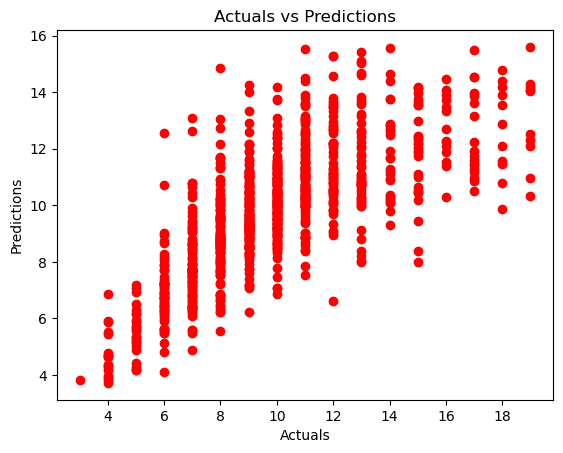

In [40]:
plt.scatter(f_test_y,forest_predictions,color='red')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()

This plots clearly shows where the model is lacking, if you look at the actuals the model does poorly in some cases with its predictions. 

### XGBoost

To understand eXtreme Gradient Boosting, we need to understand the logic behind boosting algorithims. They build various weak models to make conclusions about the various importance of features to reduce them. Ultimately, XGBoost is an implementaion of Gradient Boosted Decision Trees. There are three different forms of gradient boosting : 
* Gradient Boosting algorithim
* Stochastic Gradient Boosting
* Regularized Gradient Boosting 


XGBoost gives us great speed in running our models and good model performance. 


In [42]:
from xgboost import XGBRegressor


In [44]:
xgb_scores = cross_val_score(xgb_pipeline, X.values, y.values, scoring="neg_mean_absolute_error")


#### Cross Validation

In [46]:
xgb_pipeline = make_pipeline(XGBRegressor())
xgb_scores = cross_val_score(xgb_pipeline, X.values, y.values, scoring="neg_mean_absolute_error")
print("MAE %2f" %(-1 * xgb_scores.mean()) )

MAE 1.557403


#### Train Test Split

In [49]:
train_X,test_X,train_y,test_y = train_test_split(X.values,y.values,test_size=0.25)

I was unable to apply the pipeline on this model as it keep printing out the following error: ` Last step of Pipeline should implement fit.` so I opted to just fit it without a pipeline.

In [50]:
xgb_model = XGBRegressor()
xgb_model.fit(train_X,train_y,verbose=False)
xgb_preds = xgb_model.predict(test_X)
print("MAE: " + str(mean_absolute_error(xgb_preds,test_y)))
print("Accuracy:",xgb_model.score(test_X,test_y))

MAE: 1.525115618757837
Accuracy: 0.48256880883222164


Below I opted to train the model again by explictly stating the number of estimators and learning rate.

In [51]:
xgb_model_II = XGBRegressor(n_estimators=1000,learning_rat=0.05)
xgb_model_II.fit(train_X,train_y,early_stopping_rounds=5,
             eval_set=[(test_X,test_y)],verbose=False)
xgb_preds = xgb_model_II.predict(test_X)
print("MAE: " + str(mean_absolute_error(xgb_preds,test_y)))
print("Accuracy:",xgb_model_II.score(test_X,test_y))

MAE: 1.4233963354578558
Accuracy: 0.5298624025159148


C:\Users\bulen\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\bulen\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:36:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "learning_rat" } are not used.

  warnings.warn(smsg, UserWarning)


We can gauge that the improvement is slightly marginal.  The difference between the XGBoost and Forests is also slightly marginal. 

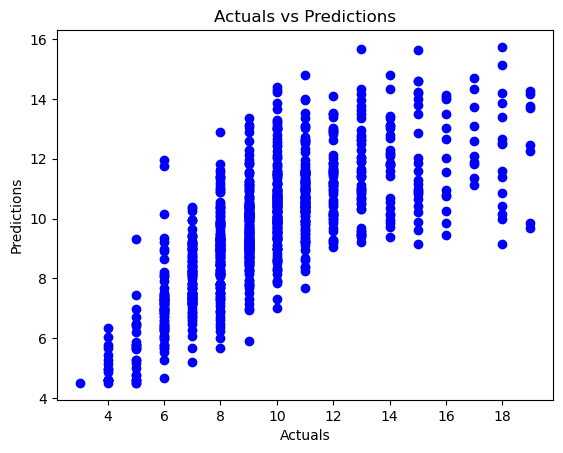

In [52]:
plt.scatter(test_y,xgb_preds,color='blue')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()

In [56]:
pip install pdpbox

  Obtaining dependency information for pdpbox from https://files.pythonhosted.org/packages/1f/2e/8f115e0c514f2057fd8a99a01f52a5cd7d6952adf98dcffae086c2bccff6/PDPbox-0.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for pqdm>=0.2.0 from https://files.pythonhosted.org/packages/9e/b7/720988acdc9b5805cd1ef311aa75d6fd1c5438b87f4add1ec8d11f78d63b/pqdm-0.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for sphinx-rtd-theme>=1.1.1 from https://files.pythonhosted.org/packages/ea/46/00fda84467815c29951a9c91e3ae7503c409ddad04373e7cfc78daad4300/sphinx_rtd_theme-2.0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for bounded-pool-executor from https://files.pythonhosted.org/packages/bc/23/72ecfe284a1da711257ff310b29c6667d0187a608322d58bf1c7a927c7b2/bounded_pool_executor-0.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for sphinxcontrib-jquery<5,>=4 from https://files.pythonhosted.org/packages/76/85/749bd22d1a68db7291c89e2ebca

## Partial Dependence Plots 

In [57]:
from sklearn.inspection import plot_partial_dependence


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\bulen\anaconda3\Lib\site-packages\sklearn\inspection\__init__.py)

Partial Dependence Plots display the effect (marginally) of a feature on the predicted outcome of a model that has just been fitted.

In [58]:
cols = ['Length','Diameter','Height']
ab_par_model = GradientBoostingRegressor()
ab_par_model.fit(X,y)
my_plots = plot_partial_dependence(ab_par_model,
                                  features=[0,2],
                                  X=X,
                                  feature_names=cols,
                                   grid_resolution=10)

<IPython.core.display.Javascript object>

NameError: name 'plot_partial_dependence' is not defined

In our case it seems that Height has more of an effect of determining the number of rings on Abalone than length. 

# Evaluation of Models

| Models        | MAE: Cross-val | MAE:Train-test  | Accuracy| Rank|
| ------------- |:-------------:| -----:| ----:|-----:|
| Decision Tree     | 1.959743 |1.597018 |0.44 |3rd|
| Random Forests   | 1.511744   | 1.521251 |0.48|2nd|
| XGBoost |1.424527    |    1.402607 |0.56|1st|

**These results are from v20 of the notebook, all the other MAE & accuracy scores are from v20 of the notebook.**

# Conclusion

The XGBoost model is clearly the superior model however, it's accuracy is only just above 50% which is pretty average at best. Also, it seems that the train-test split might be the best path  to train the model. However, with the Decision Tree the cross-validation has the highest MAE. So overall using that techinque does not improve our model has I would've hoped at first.

The next steps would be to do more feature engineering and some hyperparameter tuning to improve the model. With respects to improvements, having a pipeline that runs all three models at the same time and prints the results together could be positive step. 


Finally to recap, we have covered:

* How to implement Sklearn pipelines.
* How to create Decision Tree, Random Forests and XGBoost regression models.
* How to detect outliers and missing values.
* How to use cross validation.
* How to implement One-Hot Encoding.
* How to create Partial Dependance Plots.

# Resources Used Manufacture This Notebook:

* [Detecting_Removing_Outliers]( https://github.com/SharmaNatasha/Machine-Learning-using-Python/blob/master/Simple%20projects/Detecting_Removing_Outliers.ipynb)

* [Data Modeling](https://github.com/AlexIoannides/ml-project-workflow/blob/master/Data%20Modelling.ipynb)

* [Random Forest Algorithm]( https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd)

* [random-forest-simple-explanation](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d)
* [random-forests-classifier-python](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)
* [gentle-introduction-xgboost]( https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)
* [Partial Dependance Plots]( https://christophm.github.io/interpretable-ml-book/pdp.html)
* [A Simple Tutorial on Exploratory Data Analysis](https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis)
* [Churn Prediction of Telco Customers](https://www.kaggle.com/meldadede/churn-prediction-of-telco-customers)
* [Data Camp](https://github.com/AmoDinho/datacamp-python-data-science-track)
